In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
#for i in range(15)
#uploaded =files.upload()
#https://drive.google.com/file/d/1kntON7I0tzbKRU1-srpbBaZMBH2_gaNT/view?usp=drive_link
!gdown --id 1kntON7I0tzbKRU1-srpbBaZMBH2_gaNT -O animal_data.zip


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1kntON7I0tzbKRU1-srpbBaZMBH2_gaNT
From (redirected): https://drive.google.com/uc?id=1kntON7I0tzbKRU1-srpbBaZMBH2_gaNT&confirm=t&uuid=98601458-287f-4fb2-b73c-830a788afd2b
To: /content/animal_data.zip
100% 38.1M/38.1M [00:00<00:00, 44.4MB/s]


In [3]:
import zipfile
with zipfile.ZipFile('animal_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

print("Dataset downloaded and extracted successfully!")


Dataset downloaded and extracted successfully!


In [4]:
import os

# List the contents of the extracted directory
dataset_path = '/content/dataset'
print("Extracted files and folders:")
print(os.listdir(dataset_path))


Extracted files and folders:
['Horse', 'Elephant', 'Dog', 'Kangaroo', 'Cow', 'Bird', 'Lion', 'Tiger', 'Cat', 'Giraffe', 'Bear', 'Dolphin', 'Panda', 'Deer', 'Zebra']


In [57]:
image_dir = '/content/dataset'


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,
                                                          validation_split=0.2  # Reserve 20% for validation
)


train_data = datagen.flow_from_directory(
    image_dir,
    target_size=(28,28),  # Resize images
    batch_size=36,
    class_mode='categorical' ,
    subset='training')

test_data = datagen.flow_from_directory(
    '/content/dataset',
    target_size=(28, 28),
    batch_size=36,
    class_mode='categorical',
    subset='validation'  # Load validation data
)

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [6]:
images,labels=next(train_data) # to work on one batch
print(images.shape)
print(labels.shape)
images,labels=next(test_data)
print(images.shape)
print(labels.shape)


(36, 28, 28, 3)
(36, 15)
(36, 28, 28, 3)
(36, 15)


In [7]:
print(train_data.class_indices)

{'Bear': 0, 'Bird': 1, 'Cat': 2, 'Cow': 3, 'Deer': 4, 'Dog': 5, 'Dolphin': 6, 'Elephant': 7, 'Giraffe': 8, 'Horse': 9, 'Kangaroo': 10, 'Lion': 11, 'Panda': 12, 'Tiger': 13, 'Zebra': 14}


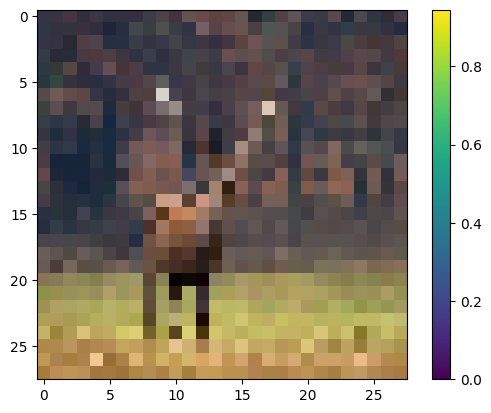

In [8]:
plt.figure()
plt.imshow(images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [58]:
#from  import Maxpooling2D, Conv2D, Dense, Flatten
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),  # Feature extraction
    tf.keras.layers.MaxPooling2D((2, 2)),  # Downsampling
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(input_shape=(28, 28,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(15)
])

In [64]:
#optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
model.fit(train_data,epochs=13)

Epoch 1/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.4996 - loss: 1.9631
Epoch 2/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6569 - loss: 1.3228
Epoch 3/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.6975 - loss: 1.1745
Epoch 4/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.8072 - loss: 0.9282
Epoch 5/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8165 - loss: 0.7888
Epoch 6/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8787 - loss: 0.6219
Epoch 7/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9005 - loss: 0.5615
Epoch 8/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9382 - loss: 0.4134
Epoch 9/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.9615 - loss: 0.3462
Epoch 10/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9735 - loss: 0.2748
Epoch 11/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9817 - loss: 0.2546
Epoch 12/13
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy:

In [66]:
prob_model=tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [67]:
test_loss, test_accuracy = model.evaluate(train_data)
print(f"Train Loss: {test_loss:.4f}")
print(f"Train Accuracy: {test_accuracy:.4f}")
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9845 - loss: 0.1626
Train Loss: 0.1660
Train Accuracy: 0.9827
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3276 - loss: 4.4939
Test Loss: 4.5928
Test Accuracy: 0.3290


In [17]:
print(test_data[0][0].shape)

(36, 28, 28, 3)


In [18]:
predictions=prob_model.predict(test_data)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [19]:
predicted_class = predictions.argmax(axis=-1)
print(predicted_class)

[ 6  6 11  3  3 14 11  6 13  7  9  8  5 11 11  6 12  7 11 11  8  7  8  9
 13  0  7 14  3 14  8 12 13  8  9  7  1  3 10  9  6  9  3  3  4 12  7  0
  5  7  8  0 11 12  7 14  2  8  7 11 11  5  6  3  0 14  6  5  6  7  1 11
  3  8  2 14  8  7  5 11  2  1  5 11  3  8 11  9  8  9  6  5  6 11 13 13
  3 13 11 11 12  3  7 11  8  5  6  6  3  3 13  5 14  4  9 12  6 12 13 14
  8  8  5 13  7 14 14  5  3  5  6 11  5  8  0  1 12  5 13 10 12  3  8 14
 12  6 13  7  4  8  7 11  8 12  4  7  7  8 11  9 11  6  3  6 12  3  1  2
  5  5 11  9 14 11  5 11  9  9 11  5  8  8  6  1  9 13 11  1  6  8  8  4
  3  7  7  0  5  8 12 13 14 12  5  8 12  4  2  4  6 14  7 12  7  3  7  5
  7  5 11  8  4  6  5  5 13 13 11  1  6 13 11  1  3 12  7  2 11  3  6 12
  0  2  5 11 12 14 13  5  8  3  8  6  9  8 11  7  7 13  6  1  5  5 11  5
 11  9  8 11  4  1 11  9 12  8  3  7  7  3 11  9  3  6  7  6 12  7  9 14
 13 12 14  1  8  5  6  8  3  6 14  9  2  7  0  9  6 11  7  5  2 11  8 11
  6  6 11 14 13  4  8  6 12  8 12  4  7  9 14  8 11

In [ ]:

images, labels = next(test_data)  # Get one batch of images and labels
predictions = model.predict(images)
class_labels = list(test_data.class_indices.keys())
for i in range(len(images)):
    plt.imshow(images[i])
    true_label = class_labels[labels[i].argmax()]
    predicted_label = class_labels[predictions[i].argmax()]
    plt.title(f"True: {true_label}, Pred: {predicted_label}")
    plt.show()

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 36)          │           1,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 36)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6084)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         778,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,345,471 (8.95 MB)

 Trainable params: 781,823 (2.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,563,648 (5.96 MB)